In [1]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from equations_of_state import iapws97
from equations_of_state.iapws_boundaries import plot_boundaries

def plot_all_vs_t(ts):
    for i,var in enumerate(['T','p','rho','h']):
        plt.subplot(4,1,i+1)
        if i!=1:
            plt.plot(ts[:,0],ts[:,3+i])
        else:
            plt.semilogy(ts[:,0],ts[:,3+i])
        plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [2]:
import batch_test_latent_sim as bt

In [3]:
def curry_run(net,eos='water_lg',prob='Transition_L2G'):
    ts_l2g,ls_l2g = bt.run_one_simulation(eos,net,
                      prob,verbose=False)
    plot_all_vs_t(ts_l2g)
    plot_boundaries()
    plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

## Linear Liquid

In [4]:
ts,ls = bt.run_one_simulation('water_linear','Poly_1,1',
                      'Linear_Liquid')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_linear/Poly_1,1/final_variables
0.1 96 1.8798275377177203e-07
0.2 66 1.948821814271849e-07
0.30000000000000004 37 1.850928334543806e-07
0.4 10 1.9530639112420934e-07
0.5 0 1.9266004429882524e-07
0.6 0 1.7424185202861404e-07
0.7 0 1.5758154397995303e-07
0.7999999999999999 0 1.4251547327403885e-07
0.8999999999999999 0 1.288905508952874e-07
0.9999999999999999 0 1.1656952462291078e-07
1.0999999999999999 0 1.0542042116779448e-07


In [6]:
ts,ls = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Linear_Liquid',verbose=False)
print(ts[-1:,:])
print(bt.Linear_Liquid.answer)

OSError: File /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_graph.meta does not exist.

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[   293.15       100000.           1006.3500758   54550.83403949]]  after  3  iterations.
[[ 1.01000000e+01  2.57489222e-01 -7.05276202e-01  2.94030878e+02
   1.00083062e+05  1.00607455e+03  5.86742990e+04]]
{'h': array(88196.2666457), 'T': 294.15, 'rho': array(997.99403545), 'p': 100000.0}


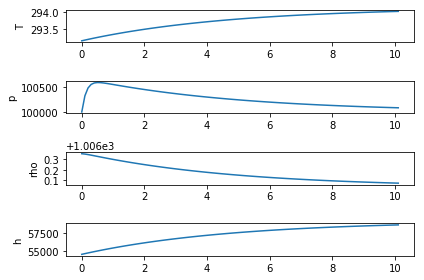

In [4]:
ts_lin_heat,ls_lin_heat = bt.run_one_simulation('water_lg',
        'Poly_1,7', 'Linear_Liquid_Heat',verbose=False)
print(ts_lin_heat[-1:,:])
print(bt.Linear_Liquid_Heat.answer)
plot_all_vs_t(ts_lin_heat)

## Hot Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0_1,5/final_variables


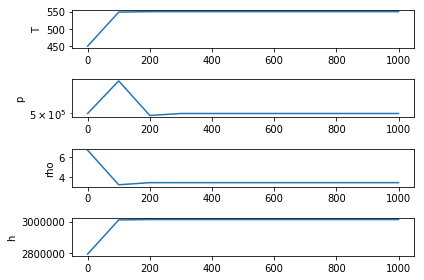

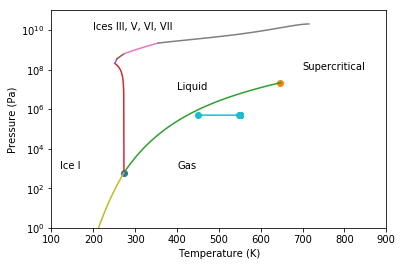

In [10]:
curry_run('Poly_pT_0_1,5',prob='Hot_Gas')

## Small Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 1.03628033e+01 2.62027117e+06]]  after  3  iterations.
10.0 23 2.0639932602950695e-08
20.0 17 3.7957647543740385e-12
30.0 18 1.7506593468983392e-12
40.0 19 1.4235297753528034e-11
50.0 21 1.50116486606359e-11
60.0 25 7.639526848376651e-11
Failed to converge at t= 70.0  |Dq| was  0.1685628703610825  after  499  iterations; quiting.


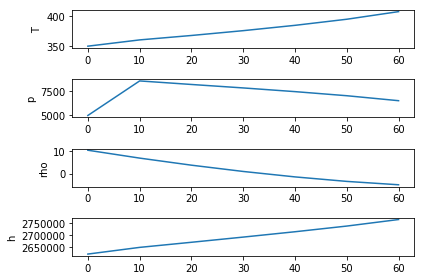

In [7]:
ts_small_gas,ls_small_gas = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas)

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Poly_2,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 2.22384004e+01 2.60310515e+06]]  after  3  iterations.
10.0 27 2.400029625801668e-11
20.0 9 4.92049963992799e-13
30.0 9 5.862648843165571e-12
40.0 9 2.002503551210904e-12
50.0 9 2.5236119675800184e-13
60.0 8 3.295708901389189e-09
70.0 8 4.749124070211614e-12
80.0 8 1.343419034437492e-13
90.0 7 1.356713870741946e-11
100.0 7 5.152354403850531e-13
110.0 6 1.9772275463556854e-11
120.0 6 7.342864637678688e-13
130.0 5 2.461890935070451e-11
140.0 5 1.2500625389784675e-12
150.0 4 3.8978725584137705e-11
160.0 4 4.42511401863091e-12
170.0 3 1.1948852635065408e-07
180.0 3 2.5179387771709424e-11
190.0 3 4.656747685711103e-12
200.0 3 3.8841055805064116e-13
210.0 2 2.106049837463729e-08
220.0 2 3.307923331381781e-11
230.0 2 1.5401606138480962e-11
240.0 2 7.053913907834289e-12
250.0 2 3.1862134675832785e-12
260.0 2 1.4254015763

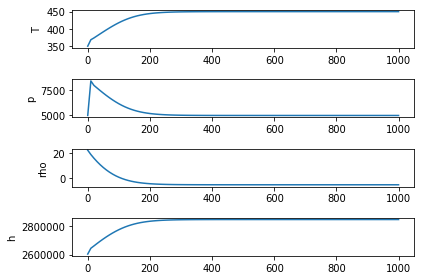

In [12]:
ts_small_gas_slgc,ls_small_gas_slgc = bt.run_one_simulation(
    'water_slgc_logp_64','Poly_2,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas_slgc)

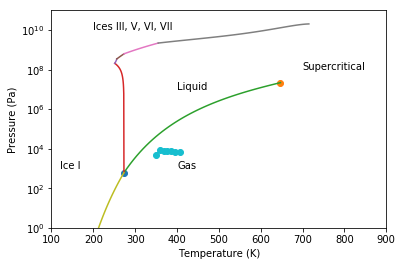

In [8]:
plot_boundaries()
plt.semilogy(ts_small_gas[:,3],ts_small_gas[:,4],'-o')

## Transition Liquid to Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.75399728e+02 3.20459230e+05]]  after  2  iterations.


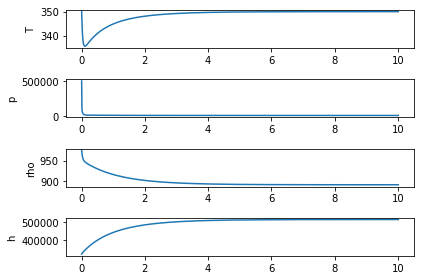

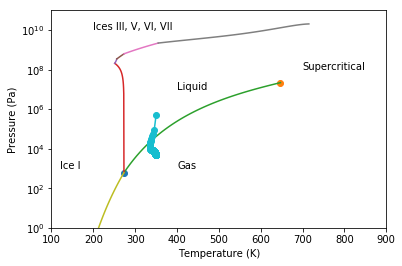

In [2]:
ts_l2g,ls_l2g = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g)
plot_boundaries()
plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Classifying_2,4,12,24,sigmoid/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.73170575e+02 3.24121968e+05]]  after  3  iterations.
Failed to converge at t= 2.949999999999981  |Dq| was  6.939751791931532  after  499  iterations; quiting.


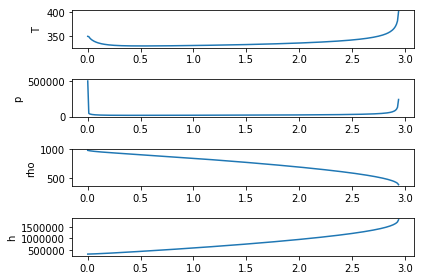

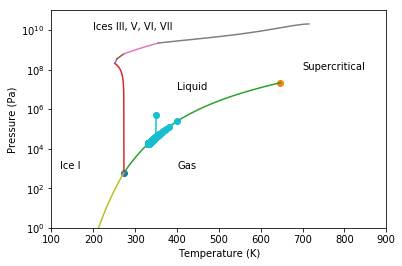

In [24]:
ts_l2g_s,ls_l2g_s = bt.run_one_simulation(
    'water_slgc_logp_64','Classifying_2,4,12,24,sigmoid',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g_s)
plot_boundaries()
plt.semilogy(ts_l2g_s[:,3],ts_l2g_s[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_pT_0_1,3,6,12,sigmoid/final_variables
Found point at  [[3.49965208e+02 5.00117957e+05 3.80920603e+08 1.58497621e+12]]  after  15  iterations, But that point was far away.
Found point at  [[3.50055540e+02 4.99892935e+05 1.31149607e+07 6.26651585e+10]]  after  20  iterations, But that point was far away.
Found point at  [[3.50177610e+02 4.99690796e+05 3.80920601e+08 1.58497620e+12]]  after  24  iterations, But that point was far away.
Failed to converge at t= 0.5200000000000002  |Dq| was  0.24785579231481408  after  499  iterations; quiting.


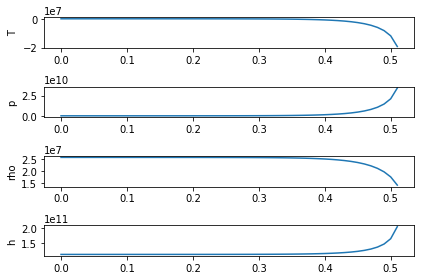

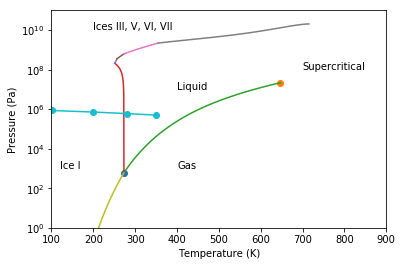

In [8]:
ts_l2g,ls_l2g = bt.run_one_simulation('water_lg','Classifying_pT_0_1,3,6,12,sigmoid',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g)plot_boundaries()
plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0_1,5/final_variables
Found point at  [[3.96702668e+02 4.35132172e+05 6.65094793e+01 2.54637316e+06]]  after  99  iterations, But that point was far away.


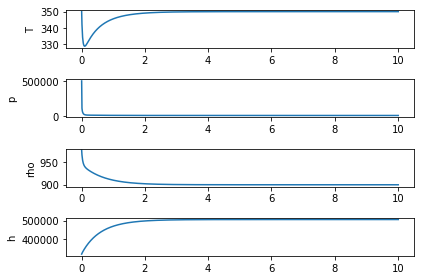

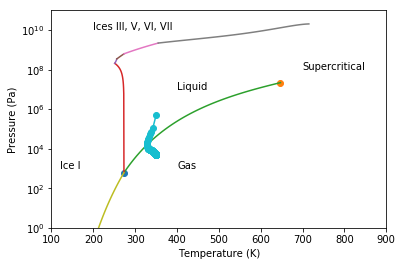

In [8]:
curry_run('Poly_pT_0_1,5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0_1,5/final_variables


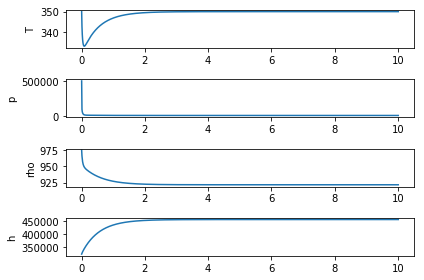

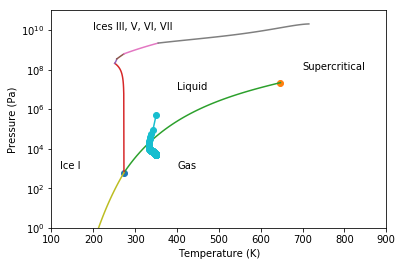

In [6]:
curry_run('Poly_rand_0_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rhoh_0_1,5/final_variables


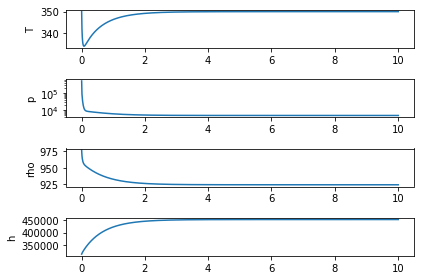

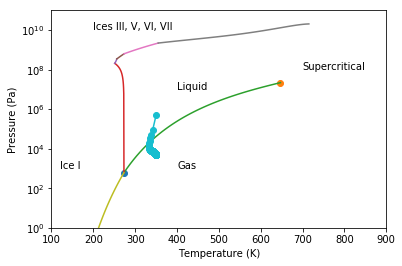

In [6]:
curry_run('Poly_rhoh_0_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_1_1,5/final_variables


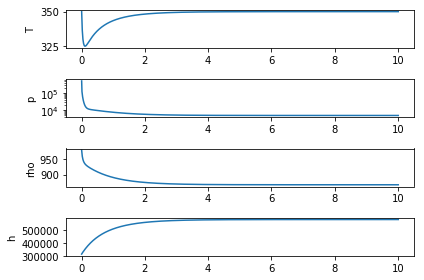

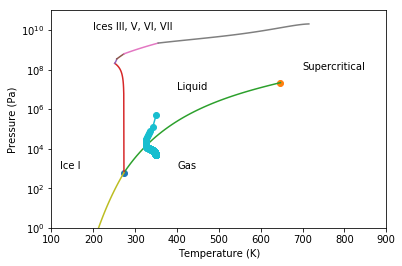

In [7]:
curry_run('Poly_pT_1_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0_1,3,6,12,sigmoid/final_variables
Failed to converge at t= 3.089999999999978  |Dq| was  1709.4250278860754  after  499  iterations; quiting.


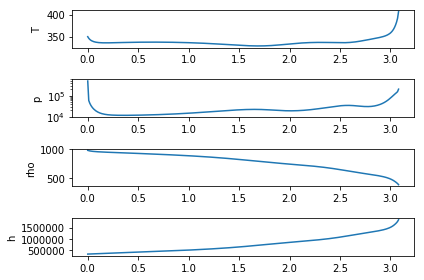

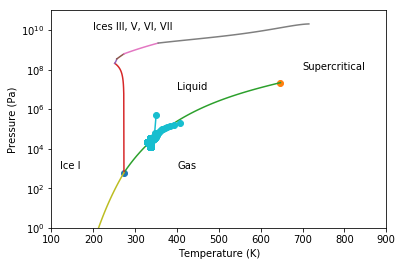

In [8]:
curry_run('Classifying_rhoh_0_1,3,6,12,sigmoid')

# Drain

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_1_1,5/final_variables


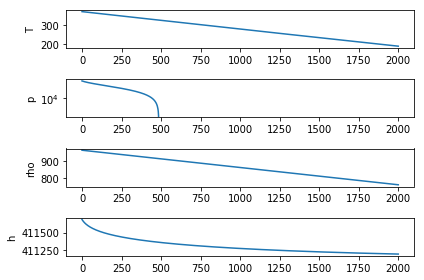

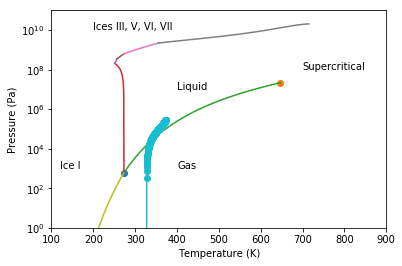

In [5]:
curry_run('Poly_pT_1_1,5',
          prob='Liquid_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0_1,3,6,12,sigmoid/final_variables
Failed to converge at t= 8.0  |Dq| was  0.01995917834030997  after  499  iterations; quiting.


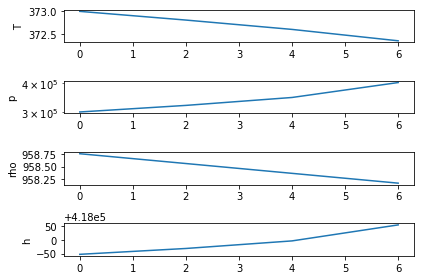

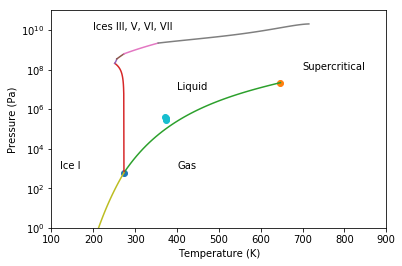

In [7]:
curry_run('Classifying_rhoh_0_1,3,6,12,sigmoid',
          prob='Liquid_Drain')

# Transition with Constant production

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_1_1,5/final_variables
Failed to converge at t= 0.6000000000000003  |Dq| was  0.011698083724414577  after  499  iterations; quiting.


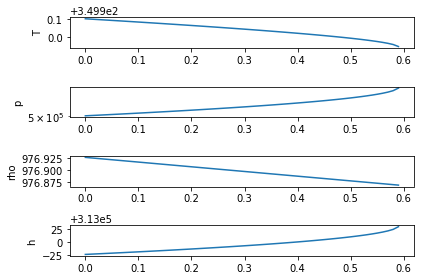

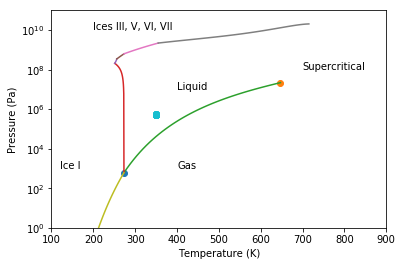

In [4]:
curry_run('Poly_pT_1_1,5',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0_1,5/final_variables
Failed to converge at t= 0.48000000000000026  |Dq| was  0.0023135794197128995  after  499  iterations; quiting.


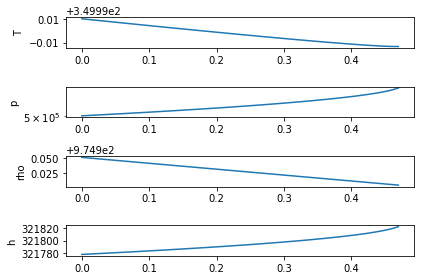

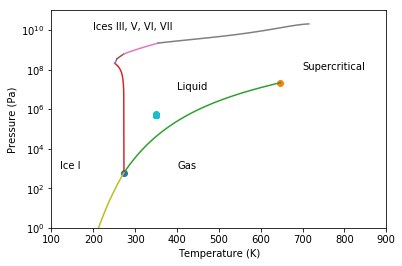

In [7]:
curry_run('Poly_rand_0_1,5',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0_1,3,6,12,sigmoid/final_variables
Failed to converge at t= 2.3299999999999943  |Dq| was  0.006220728412619889  after  499  iterations; quiting.


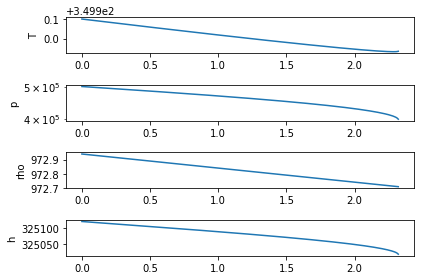

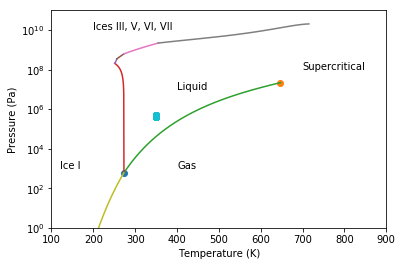

In [6]:
curry_run('Classifying_rhoh_0_1,3,6,12,sigmoid',
          prob='Transition_L2G_Drain')

In [11]:
curry_run('Classifying_rand_0_1,3,6,12,sigmoid',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rand_0_1,3,6,12,sigmoid/final_variables
Found point at  [[-1.21597190e+18  1.21361806e+21  3.52997717e+24 -6.89046802e+26]]  after  17  iterations, But that point was far away.
Found point at  [[-1.98070406e+29  6.96202004e+32  8.40403646e+36 -5.34167828e+39]]  after  19  iterations, But that point was far away.
Found point at  [[-1.46366988e+17  1.23120673e+20 -1.78845140e+24  3.48725055e+26]]  after  10  iterations, But that point was far away.
None of the initial guesses converged!


RuntimeError: None of the initial guesses converged!